## Promedio


In [21]:
import numpy as np
from scipy import signal


In [22]:
def mean_filter(imagen, kernel_size):
    kernel = (np.ones(kernel_size, np.float))
    kernel = kernel * (1 / (kernel_size[0] * kernel_size[1]))

    return signal.convolve2d(imagen, kernel, mode='same')

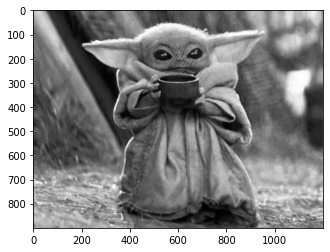

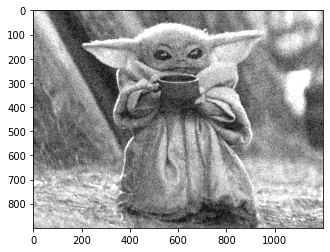

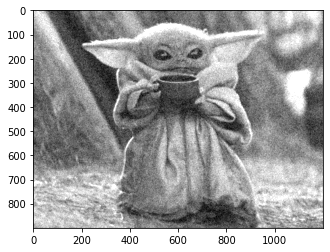

In [23]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/baby_yoda.jpg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape
noise = np.random.normal(loc = 30, scale = 60, size = (m,n))

image_with_noise = image + noise
kernel_size = (3,3)

filtered_image = mean_filter(image_with_noise, kernel_size)


#fig, axs = plt.subplots(1, 4)
#plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(noise, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Ruido')

axs[2].imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Imagen con ruido')"""
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""axs[3].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Imagen Modificada')"""
plt.show()


plt.imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.show()


## Promedio geometrico

In [ ]:
import numpy as np
from scipy import signal


In [ ]:
from scipy.stats.mstats import gmean
import cv2

def geometric_mean_filter(image, kernel_size):
    """
    This function applies the mean filter to an image in array format
    :param image: Path to img
    :return: Saves the median filtered image to ResultadoMediana.jpg
    """

    (height, width) = image.shape

    blank_image = np.zeros((height, width), np.uint8)
    for i in range(width):
        for j in range(height):
            blank_image[j, i] = geometric_mean_filter_aux(image, kernel_size, i, j)
    return blank_image


def geometric_mean_filter_aux(Imagen, window, coordena_x, coordena_y):
    """
    Auxilary functio for the mean calculation, get a submatrix that will act as a kernel for the image
    :param Imagen: Array (numpy) representing the image
    :param window: Size of the kernel or window
    :param coordena_x: Coordinate for the submatrix center in x
    :param coordena_y: Coordinate for the submatrix center in y
    :return: An array with the mean values for each channel
    """

    kernel = cv2.getRectSubPix(Imagen, window, (coordena_x, coordena_y)).clip(1, 255)
    prod = np.prod(kernel) + 1
    return prod**(1/(window[0]*window[1]))

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/chest.jpg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape
noise = np.random.normal(loc = 30, scale = 30, size = (m,n))

image_with_noise = image + noise
kernel_size = (3,3)

image_with_noise = np.float32(image_with_noise).clip(0, 255)
filtered_image = geometric_mean_filter(image_with_noise, kernel_size)


#fig, axs = plt.subplots(1, 4)
#plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(noise, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Ruido')

axs[2].imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Imagen con ruido')"""
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""axs[3].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Imagen Modificada')"""
plt.show()

plt.imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Promedio Armónico

In [10]:
pkg load image

function filtered_image = harmonic_mean_filter(img, kernel_dims)
    [m, n] = size(img);
    filtered_image = zeros(m, n);
    
    
    for i = 1:n
        for j = 1:m
            submatrix = get_submatrix(img, kernel_dims, kernel_dims, i , j);
            %subma = block(image, i , j, kernel_dims, kernel_dims);
            [m2, n2] = size(submatrix);
            sum_items = 0;
            for x = 1:n2
                for y = 1:m2
                    if (submatrix(y, x) != 0)
                        sum_items = sum_items + 1/(submatrix(y, x));
                    endif
                endfor
            endfor
            filtered_image(j , i) = (m2*n2)/sum_items;
        endfor
    endfor
endfunction



function [L] = block(A, x, y, size_m, size_n)
    [m, n] = size(A);
    cond1 = m < (size_m + x - 1);
    cond2 = n < (size_n + y - 1);
    if cond1 && cond2
        L = A(x:end, y:end);
    elseif cond1
        L = A(x:end, y:y+size_n-1);
    elseif cond2
        L = A(x:x+size_m-1, y:end);
    else
        L = A(x:x+size_m-1, y:y+size_n-1);
    endif
endfunction


function submatrix = get_submatrix(image, size_x, size_y, i , j)
    distance_x = round(size_x/2) - 1;
    distance_y = round(size_y/2) - 1; 
    submatrix = get_submatrix_aux(image, distance_x, distance_x, distance_y, distance_y, i, j);
    
endfunction

function submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down, i, j) 
    [m, n] = size(image);
    if (i - size_x_left < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left - 1, size_y_up, size_y_down, i, j);
    elseif (i + size_x_right > n)
        submatrix = get_submatrix_aux(image, size_x_right - 1, size_x_left, size_y_up, size_y_down, i, j);
    elseif (j - size_y_up < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up - 1, size_y_down, i, j);
    elseif (j + size_y_down > m)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down - 1, i, j);
    else
        submatrix = image( (j - size_y_up):(j + size_y_down), (i - size_x_left):(i + size_x_right));
    endif
endfunction

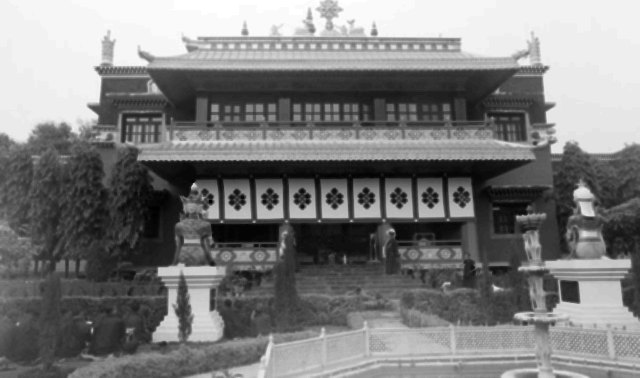

In [11]:
pkg load image

img = imread("./Imagenes/edificio_china.jpg");
[m, n] = size(img);
img = im2double(img);
x = 0.1 * randn(m, n);

noisy_image = img + x;

filtered_image = harmonic_mean_filter(img, 3);

imshow(filtered_image)


## Promedio contra armonico


In [17]:
import cv2
import numpy as np

def contraharmonic_mean_filter(image, kernel_dims, R):
    (m, n) = image.shape
    
    result = np.zeros((m,n), np.float)
    
    for i in range(n):
        for j in range(m):
            kernel = cv2.getRectSubPix(image, (kernel_dims, kernel_dims), (i, j))
            
            numerator_power = np.power(kernel, R + 1)
            denominator_power = np.power(kernel, R)
            
            numerator = np.sum(numerator_power)
            denominator = np.sum(denominator_power)
            
            result[j, i] = numerator/denominator
    return result
            
            
            
       

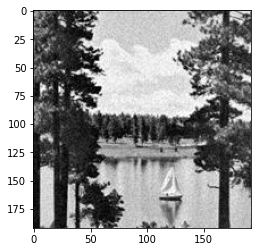

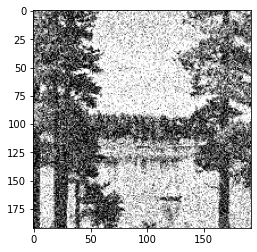

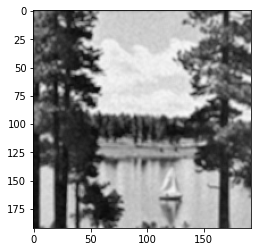

In [36]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/T.jpeg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape
noise = np.random.normal(loc = 30, scale = 60, size = (m,n))

image_with_noise = image + noise
kernel_size = (3,3)
image_with_noise = np.float32(image_with_noise).clip(0, 255)

filtered_image = contraharmonic_mean_filter(image, 3, 0.3)


#fig, axs = plt.subplots(1, 4)
#plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original')

axs[1].imshow(noise, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Ruido')

axs[2].imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Imagen con ruido')"""
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
"""axs[3].imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Imagen Modificada')"""
plt.show()


plt.imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Filtro Punto Medio 

In [6]:
pkg load image

function filtered_image = mid_point_filter(img, kernel_dims)
    [m, n] = size(img);
    filtered_image = zeros(m, n);
    
    
    for i = 1:n
        for j = 1:m
            submatrix = get_submatrix(img, kernel_dims, kernel_dims, i , j);
            max_value = max(max(submatrix));
            min_value = min(min(submatrix));
            
            filtered_image(j , i) = (max_value + min_value)/2;
        endfor
    endfor
endfunction



function submatrix = get_submatrix(image, size_x, size_y, i , j)
    distance_x = round(size_x/2) - 1;
    distance_y = round(size_y/2) - 1; 
    submatrix = get_submatrix_aux(image, distance_x, distance_x, distance_y, distance_y, i, j);
    
endfunction

function submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down, i, j) 
    [m, n] = size(image);
    if (i - size_x_left < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left - 1, size_y_up, size_y_down, i, j);
    elseif (i + size_x_right > n)
        submatrix = get_submatrix_aux(image, size_x_right - 1, size_x_left, size_y_up, size_y_down, i, j);
    elseif (j - size_y_up < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up - 1, size_y_down, i, j);
    elseif (j + size_y_down > m)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down - 1, i, j);
    else
        submatrix = image( (j - size_y_up):(j + size_y_down), (i - size_x_left):(i + size_x_right));
    endif
endfunction

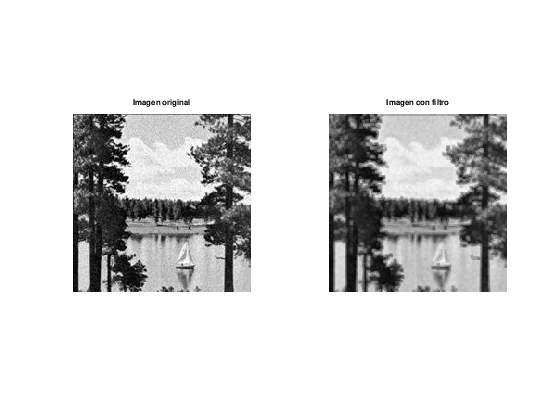

In [10]:
pkg load image
img = imread("./Imagenes/T.jpeg");
subplot(1,2,1);
imshow(img);
title('Imagen original');


noisy_image = im2double(img);

filtered_image = mid_point_filter(noisy_image, 3);


subplot(1,2,2);
imshow(filtered_image);
title('Imagen con filtro');

## Filtro Ideal (Rechazo de Banda)